In [1]:
from obja import obja
from objb import objb
from objc import objc
from objd import objd

In [2]:
objc([1,1],4)

(array([[ 802., -400.],
        [-400.,  200.]]),)

In [3]:
objd([1,1],1)[0]

0.1765473328271171

In [4]:
objd([1,1],2)

(array([0.20699076, 0.29263285]),)

In [5]:
objd([1,1],4)

(array([[-0.40699334, -0.38423725],
        [-0.38423725,  0.133168  ]]),)

In [6]:
import random
import numpy as np
def StepSize(fun, x, d, alfa, params):
    # fun a pointer to a function (such as obja, objb, objc)
    # x a dictionary that on input has x['p'] set to the starting point values x = {'p': [-1.2, 1.0]}
    # and x['f'] and x['g'] set to the function and gradient values respectively.
    # d a vector containing the search direction
    # alfa the initial value of the step length
    # params a dictionary containing parameter values for the routine
    # params = {'ftol': 0.1,'gtol': 0.7,'xtol': 1e-6,: 100};
    #     Note that ftol and gtol were referred to as c1 and c2 in lectures. Return values are a
    #     dictionary inform that contains information about the run ('iter', 'status') and a new
    #     dictionary x containing the final solution values and function and gradient at that point.
    
    alphaL = 0
    alphaR = 1000
    
    for itera in range(params['maxit']):
        fi_k_t = fun(x['p'] + alfa * d, 1)[0]
        
        if fi_k_t > (x['f'] + params['ftol'] * alfa * x['g'].dot(d)):
            
            alphaR = alfa
            alfa = (alphaL + alphaR) / 2
            if abs(alphaL - alphaR) < params['xtol']:
                alpha_s = 1000
                status = 'ERROR'
                x_p = x['p'] + alpha_s * d
                x_n = {'p': x_p, 'f': fun(x_p, 1)[0], 'g': fun(x_p, 2)[0]}
                #print(alphaL, alphaR, abs(alphaL - alphaR), itera)
                return x_n, alpha_s, itera, status
            else:
                continue
        else:
            fi_k_t_d = fun(x['p'] + alfa * d, 2)[0].dot(d)
            if fi_k_t_d >= params['gtol'] * x['g'].dot(d):
                alpha_s = alfa
                status = 'OK'
                x_p = x['p'] + alpha_s * d
                x_n = {'p': x_p, 'f': fun(x_p, 1)[0], 'g': fun(x_p, 2)[0]}
                return x_n, alpha_s, itera, status
            else:
                alpha_L = alfa
            if alphaR > 500:
                alfa = 2 * alpha_L
                continue
    if itera == (params['maxit']-1):
        alpha_s = 1000
        status = 'ERROR'
        x_p = x['p'] + alpha_s * d
        x_n = {'p': x_p, 'f': fun(x_p, 1)[0], 'g': fun(x_p, 2)[0]}
        return x_n, alpha_s, itera, status

In [7]:
StepSize(obja, {'p': np.array([-1.2,1.0]), 'f': obja(np.array([-1.2,1.0]), 1)[0], 'g': obja(np.array([-1.2,1.0]), 2)[0]}\
         , -obja(np.array([-1.2,1.0]), 2)[0], 0.1, {'ftol': 0.1,'gtol': 0.7,'xtol': 1e-6,'maxit': 100})

({'p': array([-1.06,  0.5 ]), 'f': -1.1864, 'g': array([-1.12,  0.  ])},
 0.1,
 0,
 'OK')

In [8]:
import numpy as np
def SteepDescent(fun, x, sdparams, stepinfo):
    # sdparams = {'maxit': 1000,'toler': 1.0e-4}
    # The output inform is a dictionary containing two fields, status is 1 if the gradient tolerance
    # was achieved and 0 if not, iter is the number of steps taken and x is the solution structure,
    # with point, function and gradient evaluations at the solution point).
    Status = 0
    alpha = 1
    d = -x['g']
    params = {'ftol': 0.1,'gtol': 0.7,'xtol': 1e-6,'maxit': 100}
    
    for Itera in range(sdparams['maxit']):
        if stepinfo == 1:
            print('Iternation-xk-dk-alpha:\n',Itera, x, d, alpha)
        else:
            None
        x_n, alpha_s, itera, status = StepSize(fun, x, d, alpha, params)
        if status == 'ERROR':
            Status = 0
            #print(alpha_s, x_n)
            return x_n, Itera + 1, Status
        else:
            if np.linalg.norm(x['p']-x_n['p']) <= sdparams['toler']:
                Status = 1
                return x_n, Itera + 1, Status
            else:
                #print(alpha_s, x_n, x['g'].dot(d)*alpha/(x_n['g'].dot(-x_n['g'])))
                alpha = max(10 * params['xtol'], x['g'].dot(d)*alpha_s/(x_n['g'].dot(-x_n['g'])))
                x = x_n
                d = -x_n['g']
    
    if Itera == sdparams['maxit']-1:
        Status = 0
        return x_n, Itera + 1, Status

In [9]:
sdparams = {'maxit': 1000,'toler': 1.0e-4}
x = {'p': np.array([1,1.0]), 'f': obja(np.array([1,1.0]), 1)[0], 'g': obja(np.array([1,1.0]), 2)[0]}
SteepDescent(obja,x,sdparams,1)

Iternation-xk-dk-alpha:
 0 {'p': array([1., 1.]), 'f': 2.0, 'g': array([3., 5.])} [-3. -5.] 1
Iternation-xk-dk-alpha:
 1 {'p': array([0.625, 0.375]), 'f': -0.15625, 'g': array([ 2.25, -1.25])} [-2.25  1.25] 0.6415094339622641
Iternation-xk-dk-alpha:
 2 {'p': array([-0.09669811,  0.7759434 ]), 'f': -0.9566237985048058, 'g': array([0.80660377, 2.75943396])} [-0.80660377 -2.75943396] 0.2571056301249644
Iternation-xk-dk-alpha:
 3 {'p': array([-0.2003893 ,  0.42121039]), 'f': -1.3791944164813599, 'g': array([ 0.5992214 , -0.78789608])} [-0.5992214   0.78789608] 1.084353501643548
Iternation-xk-dk-alpha:
 4 {'p': array([-0.28161028,  0.52800513]), 'f': -1.4483844935358834, 'g': array([0.43677945, 0.28005126])} [-0.43677945 -0.28005126] 0.49335080585413366
Iternation-xk-dk-alpha:
 5 {'p': array([-0.38935302,  0.45892337]), 'f': -1.4793207982129921, 'g': array([ 0.22129395, -0.41076631])} [-0.22129395  0.41076631] 0.3050356287289294
Iternation-xk-dk-alpha:
 6 {'p': array([-0.42310429,  0.521572

({'p': array([-0.49994256,  0.50000292]),
  'f': -1.4999999966583522,
  'g': array([1.14876053e-04, 2.91618970e-05])},
 22,
 1)

## Problem 2 testing

In [10]:
import globals
from numpy import array
import math

globals.initialize()

def objt(x,mode):
    z = ()
    if mode & 1:
        globals.numf += 1
        z += (x[0]**2 + math.exp(x[0]),)
    if mode & 2:
        globals.numg += 1
        z += (array([2*x[0] + math.exp(x[0])]),)
    if mode & 4:
        globals.numH += 1
        z += (array([2 + math.exp(x[0])]),)
    return z

In [11]:
sdparams = {'maxit': 1000,'toler': 1.0e-4}
x_p = np.array([1.0])
x = {'p': x_p, 'f': objt(x_p, 1)[0], 'g': objt(x_p, 2)[0]}
x_n, Itera_s, Status = SteepDescent(objt,x,sdparams,1)
x_n, Itera_s, Status

Iternation-xk-dk-alpha:
 0 {'p': array([1.]), 'f': 3.718281828459045, 'g': array([4.71828183])} [-4.71828183] 1
Iternation-xk-dk-alpha:
 1 {'p': array([-1.35914091]), 'f': 2.104145390046132, 'g': array([-2.46140046])} [2.46140046] 1.8372709356532182
Iternation-xk-dk-alpha:
 2 {'p': array([-0.22857603]), 'f': 0.8479128015032571, 'g': array([0.33851374])} [-0.33851374] 24.28427684230551
Iternation-xk-dk-alpha:
 3 {'p': array([-0.3570223]), 'f': 0.8272218157021405, 'g': array([-0.01428771])} [0.01428771] 212.99649644073634
Iternation-xk-dk-alpha:
 4 {'p': array([-0.35107849]), 'f': 0.8271846064830907, 'g': array([0.00177153])} [-0.00177153] 27.060335136856043
Iternation-xk-dk-alpha:
 5 {'p': array([-0.35182752]), 'f': 0.8271840380229156, 'g': array([-0.00025361])} [0.00025361] 20.63122704199265
Iternation-xk-dk-alpha:
 6 {'p': array([-0.35166401]), 'f': 0.8271840326939975, 'g': array([0.00018843])} [-0.00018843] 1.1679098379285413
Iternation-xk-dk-alpha:
 7 {'p': array([-0.35177405]), 'f'

({'p': array([-0.35172651]),
  'f': 0.8271840261975698,
  'g': array([1.94610318e-05])},
 8,
 1)

(0.0, 10.0)

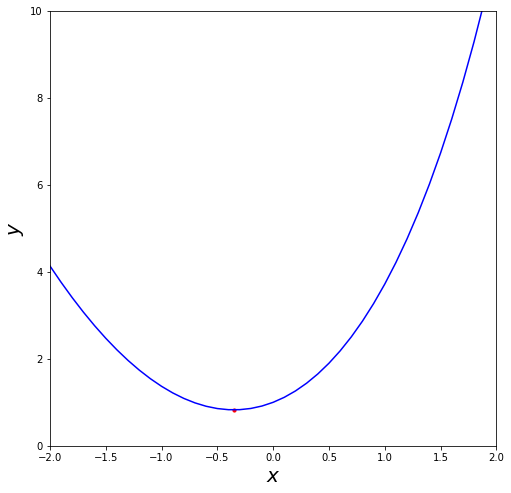

In [12]:
import matplotlib.pyplot as plt
xi = np.arange(-2, 2, 0.1)
yi = np.zeros(xi.shape[0])
for i in range(xi.shape[0]):
    yi[i] = xi[i] ** 2 + math.exp(xi[i])

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(xi, yi, c = 'b', alpha = 1)
ax.scatter(x_n['p'], x_n['f'], c = 'r', s = 10, alpha = 1)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
ax.set_xlim([-2,2])
ax.set_ylim([0,10])

## Problem 3

##  (a)

## $$f(x)=x_{1}^{2}+5x_{2}^{2}+x_{1}-5x_{2}$$

In [13]:
sdparams = {'maxit': 1000,'toler': 1.0e-4}
x_p = np.array([-1.2, 1])
x = {'p': x_p, 'f': obja(x_p, 1)[0], 'g': obja(x_p, 2)[0]}
x_n, Itera_s, Status = SteepDescent(obja,x,sdparams,0)
x_n, Itera_s, Status

({'p': array([-0.49994395,  0.49998335]),
  'f': -1.499999995472489,
  'g': array([ 0.00011209, -0.00016651])},
 20,
 1)

## (b)

## $$f(x)=x_{1}^{2}+5x_{1}x_{2}+100x_{2}^{2}-x_{1}+4x_{2}$$

In [14]:
sdparams = {'maxit': 1000,'toler': 1.0e-4}
x_p = np.array([-1.2, 1])
x = {'p': x_p, 'f': objb(x_p, 1)[0], 'g': objb(x_p, 2)[0]}
x_n, Itera_s, Status = SteepDescent(objb,x,sdparams,0)
x_n, Itera_s, Status

({'p': array([ 0.58370683, -0.03456573]),
  'f': -0.3626583810179994,
  'g': array([-0.005415  ,  0.00538771])},
 175,
 1)

## (c)

## $$f(x)=100(x_{2}-x_{1}^{2})^{2}+(1-x_{1})^{2}$$

In [15]:
sdparams = {'maxit': 2000,'toler': 1.0e-4}
x_p = np.array([-1.2, 1])
x = {'p': x_p, 'f': objc(x_p, 1)[0], 'g': objc(x_p, 2)[0]}
x_n, Itera_s, Status = SteepDescent(objc,x,sdparams,0)
x_n, Itera_s, Status

({'p': array([0.96347374, 0.92817193]),
  'f': 0.001335371577617823,
  'g': array([-0.030772  , -0.02194171])},
 1231,
 1)

## (d)

In [16]:
sdparams = {'maxit': 3000,'toler': 1.0e-4}
x_p = np.array([-1.2, 1])
x = {'p': x_p, 'f': objd(x_p, 1)[0], 'g': objd(x_p, 2)[0]}
x_n, Itera_s, Status = SteepDescent(objd,x,sdparams,0)
x_n, Itera_s, Status

({'p': array([ 1.50486039, -2.24730506]),
  'f': 2.347862422855277,
  'g': array([ 1.68798151, -1.62933146])},
 2298,
 0)

In [17]:
import SteepDescent as SD

sdparams = {'maxit': 1000,'toler': 1.0e-4}
x_p = np.array([-1.2, 1])
x = {'p': x_p, 'f': obja(x_p, 1)[0], 'g': obja(x_p, 2)[0]}
x_n, Itera_s, Status = SD.SteepDescent(obja,x,sdparams)
x_n, Itera_s, Status

({'p': array([-0.49994395,  0.49998335]),
  'f': -1.499999995472489,
  'g': array([ 0.00011209, -0.00016651])},
 20,
 1)

## Problem 5

In [18]:
alphaF = 1
betaF = 2
N = 10

Z = np.random.rand(2*N)
Z

array([0.51416421, 0.97699315, 0.70428362, 0.81582025, 0.49906612,
       0.80902157, 0.2908174 , 0.84830223, 0.71473359, 0.85155162,
       0.16568302, 0.62812765, 0.8792907 , 0.91261697, 0.17870675,
       0.31732679, 0.71772414, 0.73124785, 0.6090679 , 0.72636356])

In [19]:
import numpy as np
import globals
import math
class geodesic():
    def __init__(self, a = 1, b = 1, x0 = (-1,-1), x1 = (1,1), n = 5):
        self.alpha = a
        self.beta = b
        self.X0 = x0
        self.X1 = x1
        self.N = n
        
    def __call__ (self, Z, mode):
        z = ()
        globals.initialize()
        if mode & 1:
            globals.numf += 1    
            z = (self.value(Z),)
            
        if mode & 2:
            globals.numg += 1
            z = (self.gradient(Z),)
            
        #if mode & 4:
        #    globals.numH += 1
        return z
    
    def rho(self, x, y):
        value = 1 + self.alpha * math.exp(-self.beta*(x**2+y**2))
        return value
    def theta(self, x, y):
        value = self.alpha * math.exp(-self.beta*(x**2+y**2))
        return value
    
    def value(self, Z):
        deltat = 1/(self.N + 1)
        F = 0
        Xi = self.X0[0]
        Yi = self.X0[1]
        Xi1 = Z[0]
        Yi1 = Z[1]
        F +=  deltat * self.rho(Xi, Yi) * (((Xi1 - Xi)/deltat)**2 + ((Yi1 - Yi)/deltat)**2)
        for i in range(self.N):
            if i == self.N -1:
                Xi = Z[2*i]
                Yi = Z[2*i + 1]
                Xi1 = self.X1[0]
                Yi1 = self.X1[1]
            else:
                Xi = Z[2*i]
                Yi = Z[2*i + 1]
                Xi1 = Z[2*(i+1)]
                Yi1 = Z[2*(i+1) + 1]
            F += deltat * self.rho(Xi, Yi) * (((Xi1 - Xi)/deltat)**2 + ((Yi1 - Yi)/deltat)**2)
        return F
    
    def gradient(self, Z):
        deltat = 1/(self.N + 1)
        deltaF = []
        
        for i in range(self.N):
            if i == 0:
                Xi_1 = self.X0[0]
                Yi_1 = self.X0[1]
                Xi = Z[2*i]
                Yi = Z[2*i + 1]
                Xi1 = Z[2*(i+1)]
                Yi1 = Z[2*(i+1) + 1]
            else:
                if i == self.N-1:
                    Xi_1 = Z[2*(i-1)]
                    Yi_1 = Z[2*(i-1) + 1]
                    Xi = Z[2*i]
                    Yi = Z[2*i + 1]
                    Xi1 = self.X1[0]
                    Yi1 = self.X1[1]
                else:
                    Xi_1 = Z[2*(i-1)]
                    Yi_1 = Z[2*(i-1) + 1]
                    Xi = Z[2*i]
                    Yi = Z[2*i + 1]
                    Xi1 = Z[2*(i+1)]
                    Yi1 = Z[2*(i+1) + 1]
                
            parF_Xi = -2*self.beta*Xi*self.theta(Xi, Yi)*((Xi1 - Xi)**2/deltat + (Yi1 - Yi)**2/deltat) \
            + 2*self.rho(Xi,Yi)*(Xi - Xi1)/deltat + 2*self.rho(Xi_1,Yi_1)*(Xi - Xi_1)/deltat
            parF_Yi = -2*self.beta*Yi*self.theta(Xi, Yi)*((Xi1 - Xi)**2/deltat + (Yi1 - Yi)**2/deltat) \
            + 2*self.rho(Xi,Yi)*(Yi - Yi1)/deltat + 2*self.rho(Xi_1,Yi_1)*(Yi - Yi_1)/deltat
            deltaF.append(parF_Xi)
            deltaF.append(parF_Yi)
            
        deltaF_np = np.array(deltaF)
        return deltaF_np

In [20]:
fun = geodesic(1,1,(-1,-1),(1,1),N)

In [21]:
fun.theta(0, 0)

1.0

In [22]:
callable(fun)

True

In [23]:
fun(Z,1)

(122.6247215390165,)

In [24]:
fun(Z,1)[0]

122.6247215390165

In [25]:
fun(Z,2)

(array([ 32.19331016,  53.57926081,  11.14226365,  -4.63425929,
          0.30986211,  -1.73447517, -20.45112305,  -0.3899392 ,
         27.48252248,   4.53434688, -42.99332383, -22.05416949,
         41.21887315,  22.68201451, -42.3400758 , -35.62992552,
         25.40548887,  17.15986418, -16.57156322, -10.09763651]),)

In [26]:
fun(Z,2)[0]

array([ 32.19331016,  53.57926081,  11.14226365,  -4.63425929,
         0.30986211,  -1.73447517, -20.45112305,  -0.3899392 ,
        27.48252248,   4.53434688, -42.99332383, -22.05416949,
        41.21887315,  22.68201451, -42.3400758 , -35.62992552,
        25.40548887,  17.15986418, -16.57156322, -10.09763651])

In [27]:
import numpy as np
class geodesic_gradient_test():
    def __init__(self, a, b, x0, x1, n, h):
        self.alpha = a
        self.beta = b
        self.X0 = x0
        self.X1 = x1
        self.N = n
        self.H = h
    
    def __call__ (self, Z):
        z = ()
        vk = []
        for i in range(2*N):
            ek = np.zeros(2*N)
            ek[i] = 1
            vk.append((self.value(Z + self.H*ek)-self.value(Z))/self.H)
        return np.array(vk)
    
    def rho(self, x, y):
        value = 1 + self.alpha * math.exp(-self.beta*(x**2+y**2))
        return value
    def theta(self, x, y):
        value = self.alpha * math.exp(-self.beta*(x**2+y**2))
        return value
    
    def value(self, Z):
        deltat = 1/(self.N + 1)
        F = 0
        Xi = self.X0[0]
        Yi = self.X0[1]
        Xi1 = Z[0]
        Yi1 = Z[1]
        F +=  deltat * self.rho(Xi, Yi) * (((Xi1 - Xi)/deltat)**2 + ((Yi1 - Yi)/deltat)**2)
        for i in range(self.N):
            if i == self.N -1:
                Xi = Z[2*i]
                Yi = Z[2*i + 1]
                Xi1 = self.X1[0]
                Yi1 = self.X1[1]
            else:
                Xi = Z[2*i]
                Yi = Z[2*i + 1]
                Xi1 = Z[2*(i+1)]
                Yi1 = Z[2*(i+1) + 1]
            F += deltat * self.rho(Xi, Yi) * (((Xi1 - Xi)/deltat)**2 + ((Yi1 - Yi)/deltat)**2)
        return F

In [28]:
vk = geodesic_gradient_test(1,1,(-1,-1),(1,1),N, 1E-6)

In [29]:
for i in range(2*N):
    ek = np.zeros(2*N)
    ek[i] = 1
    print(ek)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0

In [30]:
callable(vk)

True

In [31]:
vk(Z)

array([ 32.19333809,  53.57928569,  11.14229036,  -4.63423061,
         0.30989008,  -1.73444465, -20.45108998,  -0.38990737,
        27.48254761,   4.53437508, -42.99329203, -22.05413281,
        41.21890015,  22.68204237, -42.34004241, -35.62989018,
        25.40552316,  17.15989963, -16.57152887, -10.09760255])

In [32]:
fun(Z,2)[0] - vk(Z)

array([-2.79270732e-05, -2.48843381e-05, -2.67124129e-05, -2.86839818e-05,
       -2.79749955e-05, -3.05203836e-05, -3.30709589e-05, -3.18335406e-05,
       -2.51266028e-05, -2.82018246e-05, -3.18021963e-05, -3.66750436e-05,
       -2.70025330e-05, -2.78576223e-05, -3.33841325e-05, -3.53429272e-05,
       -3.42876393e-05, -3.54467393e-05, -3.43492335e-05, -3.39587538e-05])

In [33]:
np.linalg.norm(fun(Z,2)[0] - vk(Z))

0.00013846929980398142

In [34]:
ErrList = []
for i in range(10):
    X = np.random.rand(2*N)
    ErrList.append(np.linalg.norm(fun(X,2)[0] - vk(X)))
print('Error of gradient calculation in 10 times:\n', ErrList)

Error of gradient calculation in 10 times:
 [0.00013954680453867382, 0.000138515545348822, 0.00014588542371495156, 0.00014610262469100328, 0.00013781936542642294, 0.0001412491180034577, 0.00014821367160578738, 0.0001423182543098739, 0.0001448559683403691, 0.00013282453955823801]


## Problem 6

In [35]:
Geodesic1 = geodesic()
print('alpha:', Geodesic1.alpha)
print('beta:', Geodesic1.beta)
print('(a,b):', Geodesic1.X0)
print('(c,d):', Geodesic1.X1)
print('N=', Geodesic1.N)

alpha: 1
beta: 1
(a,b): (-1, -1)
(c,d): (1, 1)
N= 5


In [36]:
x_p = np.random.rand(2*Geodesic1.N)
x = {'p': x_p, 'f': Geodesic1(x_p, 1)[0], 'g': Geodesic1(x_p, 2)[0]}
x

{'p': array([0.70108889, 0.12900783, 0.35185474, 0.55518099, 0.36052401,
        0.47782087, 0.9606017 , 0.66568297, 0.85540824, 0.69925981]),
 'f': 36.359541166956525,
 'g': array([ 28.35111926,   6.90820067,  -6.90016296,   9.6954597 ,
        -13.25733468,  -6.94521465,  13.781994  ,   3.29925856,
         -4.16863026,  -4.44353443])}

In [37]:
sdparams = {'maxit': 2000,'toler': 1.0e-4}
x_n, Itera_s, Status = SteepDescent(Geodesic1,x,sdparams, 0)
x_n, Itera_s, Status

({'p': array([-0.58617946, -0.58661693, -0.2214127 , -0.22207693,  0.08596542,
          0.08525978,  0.37398302,  0.37337486,  0.67106499,  0.67069048]),
  'f': 12.556443975430051,
  'g': array([ 0.00063248, -0.00053677,  0.00107533, -0.00070123,  0.00076214,
         -0.001123  ,  0.00121109, -0.00041579,  0.00032566, -0.00067511])},
 75,
 1)

In [38]:
x_n['p'].reshape((Geodesic1.N, 2))

array([[-0.58617946, -0.58661693],
       [-0.2214127 , -0.22207693],
       [ 0.08596542,  0.08525978],
       [ 0.37398302,  0.37337486],
       [ 0.67106499,  0.67069048]])

## Problem 7

In [39]:
Geodesic2 = geodesic(4, 5, x0 = (-1,-1), x1 = (1,1), n = 10)
print('alpha:', Geodesic2.alpha)
print('beta:', Geodesic2.beta)
print('(a,b):', Geodesic2.X0)
print('(c,d):', Geodesic2.X1)
print('N=', Geodesic2.N)

alpha: 4
beta: 5
(a,b): (-1, -1)
(c,d): (1, 1)
N= 10


In [40]:
x_p = np.random.rand(2*Geodesic2.N)
x = {'p': x_p, 'f': Geodesic2(x_p, 1)[0], 'g': Geodesic2(x_p, 2)[0]}
sdparams = {'maxit': 1000,'toler': 1.0e-4}
x_n, Itera_s, Status = SteepDescent(Geodesic2,x,sdparams, 0)
x_n, Itera_s, Status

({'p': array([-0.94522614, -0.69594431, -0.88883492, -0.39174478, -0.8195212 ,
         -0.09043487, -0.71283905,  0.18957069, -0.5581709 ,  0.42509608,
         -0.36128099,  0.60781467, -0.13112831,  0.73952288,  0.12495644,
          0.82843146,  0.40273843,  0.89091049,  0.69769396,  0.9455418 ]),
  'f': 11.57597732216398,
  'g': array([ 1.44845668e-04,  6.39000463e-04,  3.84952493e-04,  1.12824552e-03,
          3.62566810e-04,  1.85629960e-03,  1.46154233e-03,  8.53308299e-04,
          9.86992699e-04,  3.15361930e-03,  1.45300070e-03, -1.34863083e-03,
          2.26039971e-03,  2.40785205e-03,  8.57519532e-04, -6.77088499e-04,
          1.37832463e-03,  4.43666088e-04,  5.33372806e-04, -1.85411838e-05])},
 141,
 1)

In [41]:
x_nn = x_n['p'].reshape((Geodesic2.N, 2))
x_nn = np.insert(x_nn, 0, values=Geodesic2.X0, axis=0)
x_nn = np.insert(x_nn, x_nn.shape[0], values=Geodesic2.X1, axis=0)

In [42]:
step = 0.01
x = np.arange(-2,2,step)
y = np.arange(-2,2,step)
X,Y = np.meshgrid(x,y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = Geodesic2.rho(X[i,j],Y[i,j])

(-2.0, 2.0)

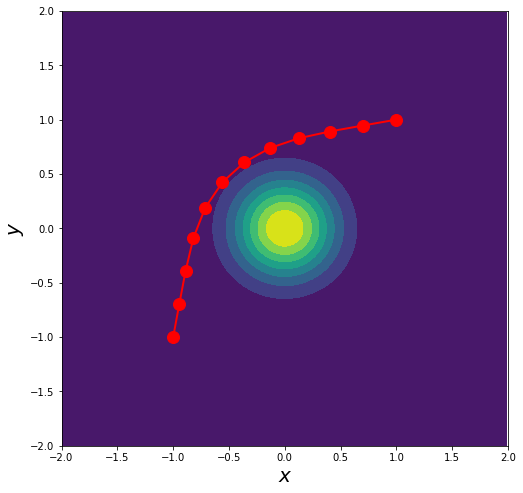

In [43]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.contourf(X,Y,Z)
ax.plot(x_nn[:,0],x_nn[:,1], color = 'r', marker='o', linestyle='solid', linewidth=2, markersize=12)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])

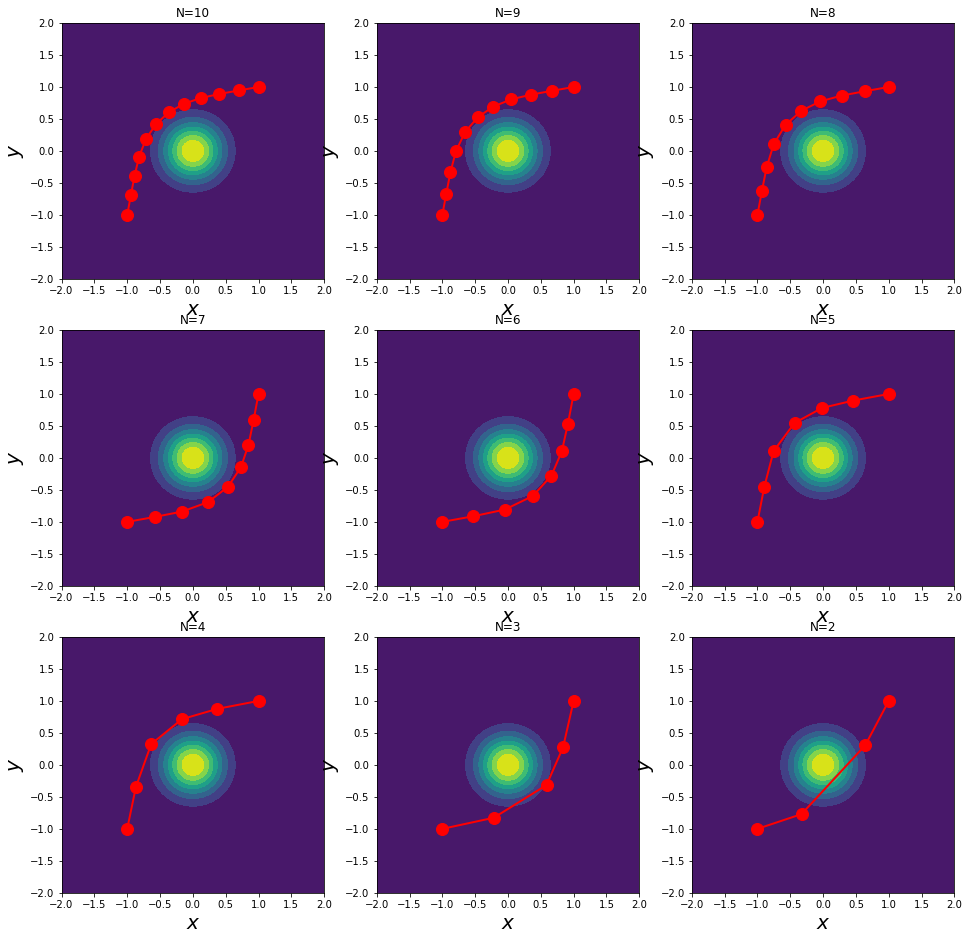

In [44]:
Np = 3
fig,ax = plt.subplots(Np,Np,figsize=(16,16))
for i in range(Np):
    for j in range(Np):
        N = 10 - (3*i+j)
        GeodesicN = geodesic(4, 5, x0 = (-1,-1), x1 = (1,1), n = N)
        x_p = np.random.rand(2*GeodesicN.N)
        x = {'p': x_p, 'f': GeodesicN(x_p, 1)[0], 'g': GeodesicN(x_p, 2)[0]}
        sdparams = {'maxit': 1000,'toler': 1.0e-4}
        x_n, Itera_s, Status = SteepDescent(GeodesicN,x,sdparams, 0)
        x_nn = x_n['p'].reshape((GeodesicN.N, 2))
        x_nn = np.insert(x_nn, 0, values=GeodesicN.X0, axis=0)
        x_nn = np.insert(x_nn, x_nn.shape[0], values=GeodesicN.X1, axis=0)
        ax[i,j].contourf(X,Y,Z)
        ax[i,j].plot(x_nn[:,0],x_nn[:,1], color = 'r', marker='o', linestyle='solid', linewidth=2, markersize=12)
        ax[i,j].set_xlabel('$x$', fontsize=20)
        ax[i,j].set_ylabel('$y$', fontsize=20)
        ax[i,j].set_title('N='+str(N))
        ax[i,j].set_xlim([-2,2])
        ax[i,j].set_ylim([-2,2])